In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

Using TensorFlow backend.


In [3]:
df = pd.read_csv('/Users/desmond/Documents/Personal Projects/lang_data.csv')

In [4]:
df.head()

,text,language
0,Ship shape and Bristol fashion,English
1,Know the ropes,English
2,Graveyard shift,English
3,Milk of human kindness,English
4,Touch with a barge-pole - Wouldn't,English


In [5]:
from io import StringIO

In [6]:
df['language_id'] = df['language'].factorize()[0]

In [7]:
language_id_df = df[['language', 'language_id']].drop_duplicates().sort_values('language_id')
language_id_to_id = dict(language_id_df.values)
id_to_languge = dict(language_id_df[['language_id', 'language']].values)
df.head(30)

,text,language,language_id
0,Ship shape and Bristol fashion,English,0
1,Know the ropes,English,0
2,Graveyard shift,English,0
3,Milk of human kindness,English,0
4,Touch with a barge-pole - Wouldn't,English,0
5,Sy kan altyd my battery natpiepie.,Afrikaans,1
6,When the shit hits the fan,English,0
7,NaN,Afrikaans,1
8,Egg on,English,0
9,Drag race,English,0


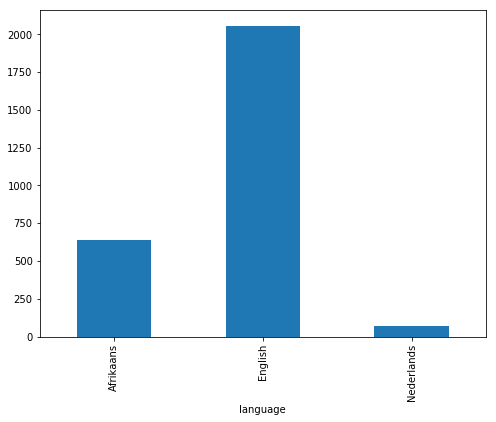

In [8]:
#Imbalanced Classes
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('language').text.count().plot.bar(ylim=0)
plt.show()

In [9]:
df.isna().sum()

text           78
language        0
language_id     0
dtype: int64

In [10]:
df.dropna()

,text,language,language_id
0,Ship shape and Bristol fashion,English,0
1,Know the ropes,English,0
2,Graveyard shift,English,0
3,Milk of human kindness,English,0
4,Touch with a barge-pole - Wouldn't,English,0
5,Sy kan altyd my battery natpiepie.,Afrikaans,1
6,When the shit hits the fan,English,0
8,Egg on,English,0
9,Drag race,English,0
10,As queer as a nine bob note,English,0


In [11]:
df= df.drop(columns=['language'])

In [12]:
df.text = str(df.text).lower()

In [13]:
df.head(30)

,text,language_id
0,0 ship shape and bris...,0
1,0 ship shape and bris...,0
2,0 ship shape and bris...,0
3,0 ship shape and bris...,0
4,0 ship shape and bris...,0
5,0 ship shape and bris...,1
6,0 ship shape and bris...,0
7,0 ship shape and bris...,1
8,0 ship shape and bris...,0
9,0 ship shape and bris...,0


In [14]:
x = df['text'].values
y = df['language_id'].values


In [15]:
x_train, x_test, y_train, y_test = \
 train_test_split(x, y, test_size=0.1, random_state=123)


In [16]:
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(x)
xtrain= tokenizer.texts_to_sequences(x_train)
xtest= tokenizer.texts_to_sequences(x_test)

In [17]:
maxlen=10
xtrain=pad_sequences(xtrain,padding='post', maxlen=maxlen)
xtest=pad_sequences(xtest,padding='post', maxlen=maxlen)

print(x_train[3])

print(xtrain[3])

0                          ship shape and bristol fashion
1                                          know the ropes
2                                         graveyard shift
3                                  milk of human kindness
4                      touch with a barge-pole - wouldn't
5                      sy kan altyd my battery natpiepie.
6                              when the shit hits the fan
7                                                     nan
8                                                  egg on
9                                               drag race
10                            as queer as a nine bob note
11                                                    nan
12                                       run the gauntlet
13                                  raining cats and dogs
14                                     no laughing matter
15                                        run of the mill
16      piet pompies van soetmelksvlei is nie van hier...
17            

In [18]:
vocab_size = 50

In [19]:
embedding_dim=50
model=Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
      output_dim=embedding_dim,
      input_length=maxlen))
model.add(layers.LSTM(units=50,return_sequences=True))
model.add(layers.LSTM(units=10))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", 
     metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 50)            2500      
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                2440      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 25,237
Trainable params: 25,237
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(xtrain,y_train, epochs=20, batch_size=16, verbose=False)

loss, acc = model.evaluate(xtrain, y_train, verbose=False)
print("Training Accuracy: ", acc.round(2))


In [ ]:
loss, acc = model.evaluate(xtest, y_test, verbose=False)
print("Test Accuracy: ", acc.round(2))